# 1. Area (*)

Create a function that takes the base and height of a triangle as input parameters and returns the area of the triangle.

In [1]:
def trianglearea(base, height):
    return base*height*0.5

print(f"A triangle with base 4 and height 7 has the area: {trianglearea(4,7)}")


A triangle with base 4 and height 7 has the area: 14.0


# 2. Euclidean distance (*)
The formula for Euclidean distance in 2D between  P:(p1,p2)  and  Q:(q1,q2) is: 
d(P,Q)= sqrt[ (p1−q1)^2+(p2−q2)^2 ]

  a)   Create a function that takes two points as input parameters and return the Euclidean between them. (*)

  b)   Let the user input two points. Call the function using the users input points. (*)

  c)   Use your function to calculate distances between the origin (0, 0) and each of these points: (10, 3), (-1, -9), (10, -10), (4, -2), (9, -10). (*)


In [20]:
def eucliddist(point1=[0,0],point2=[0,0]):
    return ( (point1[0]-point2[0])**2. + (point1[1]-point2[1])**2. )**0.5

print(f"a) Distance between points [-1,4] and [1,2] is: {eucliddist([-1,4],[1,2]):.3f}")

# b) user input

coords   = input("Wite coordinates of two points in 2D as x1 y1 x2 y2 (with spaces): ").split()
if len(coords) == 4:
    coords   = [int(coord) for coord in coords]
    print(f"Your points are ({coords[0]},{coords[1]}) and ({coords[2]},{coords[3]}).")
    distance = eucliddist([coords[0],coords[1]],[coords[2],coords[3]])
    print(f"Distance between your points are: {distance:.3f}")
else:
    print("ERROR: Incorrect input.")

# c)

point1     =  [0,0]
point2list = [[10,3],[-1,-9],[10,-10],[4,-2],[9,-10]]
for point2 in point2list:
    distance = eucliddist(point1,point2)
    print(f"Distance from origin to {point2} is: {distance:.3f}")


a) Distance between points [-1,4] and [1,2] is: 2.828
Your points are (1,2) and (3,4).
Distance between your points are: 2.828
Distance from origin to [10, 3] is: 10.440
Distance from origin to [-1, -9] is: 9.055
Distance from origin to [10, -10] is: 14.142
Distance from origin to [4, -2] is: 4.472
Distance from origin to [9, -10] is: 13.454


# 3. Mathematical functions (*)

Make the following functions with def or lambda and plot their graphs in the same figure window, with  x∈[−10,10]  :

  a)    f(x) = x2 - 3  (*)

  b)    g(x) = 4x - 7  (*)

What could the relation between  f(x)  and  g(x)  be?


Derivation of f(x) and g(x) gives
f'(x) = 2x
g'(x) = 4
Figure shows that at one point both f(x) = g(x) and f'(x) = g'(x).
f' = g' gives x = 2 (as seen in the figure).
f(x) = g(x) gives x^2 - 4x + 4 = 0 which is correct at x=2 (and -2).



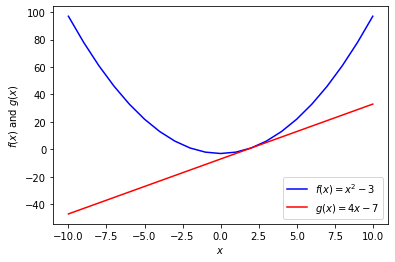

In [46]:
import matplotlib.pyplot as plt
# Define functions
funcf = lambda x: x*x - 3
funcg = lambda x: 4*x - 7

# Define x range and compute functions
fx    = []
gx    = []
xlist = []
for x in range(-10,11):
    xlist.append(x)
    fx.append(funcf(x))
    gx.append(funcg(x))

plt.plot(xlist,fx,'b',label=r"$f(x) = x^2 - 3$")
plt.plot(xlist,gx,'r',label=r"$g(x) = 4x - 7$")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$ and $g(x)$")
plt.legend()

print(f"""
Derivation of f(x) and g(x) gives
f'(x) = 2x
g'(x) = 4
Figure shows that at one point both f(x) = g(x) and f'(x) = g'(x).
f' = g' gives x = 2 (as seen in the figure).
f(x) = g(x) gives x^2 - 4x + 4 = 0 which is correct at x=2 (and -2).
""")


# 4. Name cleaner (*)

Create a function that takes a name as an input and:

removes all leading and trailing blank spaces
make capitalize the first character of each name, and make the rest lowercase
Use your function on this list of strings:

["  MaRcUs ", " iDA aNderSon", "OLOF Olofsson            "  ]

In [4]:

def cleanname(name):
    name = name.strip(" ") # Remove excess spaces except between names
    name = name.lower()    # Changes all to lower case
    name = name.split()    # Splits different names in same string to remove leftover spaces
    name = " ".join(name)  # Joins name with space between
    name = name.title()    # Capitalizes all first letters
    return name
    """
    # Old solution before I discovered the title()-function! Kept it here for fun and future reference.
    newname = []              # Need a temporary name list
    for n,subname in enumerate(name):
        # Change first letter of each name to capital letter. Join together with rest of the name
        newname.append("".join([name[n][0].upper(),name[n][1:]]))
    newname = " ".join(newname) # Join together names into one string with spaces between
    return newname
    """
#
# Use function on these names
#
namelist = ["  MaRcUs ", " iDA aNderSon", "OLOF Olofsson            "," test1 test2   test3   "  ]
for name in namelist:
    print(cleanname(name))


MaRcUs
Marcus
iDA aNderSon
Ida Anderson
OLOF Olofsson
Olof Olofsson
test1 test2   test3
Test1 Test2 Test3


# 5. Change (**)

Create a function that takes a value as input parameter and print out the banknotes and coins in Swedish currency representing this value. For example 5289 would give the following printout:

- 5st 1000-lapp
- 1st 200-lapp
- 1st 50-lapp
- 1st 20-lapp
- 1st 10-krona
- 1st 5-krona
- 2st 2-krona

Now let the user input a value, and use the function to calculate the change.

In [118]:
def returnmoney(summ):
    bills     = [1000,200,100,50,20,10,5,2,1]
    billnames = ["1000-lapp","200-lapp","100-lapp","50-lapp","20-lapp","10-krona","5-krona","2-krona","1-krona"]
    leftover  = [summ,0]
    nbills    = []
    for bill in bills:
        # Modulus to see amount left when we remove one type of bills
        leftover[1] = leftover[0]%bill
        # Save how many of each bills we can give
        nbills.append((leftover[0]-leftover[1])/bill)
        # Update leftovers
        leftover[0] = leftover[1]
    return nbills,billnames

import random as rnd
summ = 5289
#summ = rnd.randint(1,10000) # To test other sums
nbills,billnames = returnmoney(summ)

print(f"Sum {summ} can be separated into")
for n,billname in enumerate(billnames):
    if nbills[n] != 0:
        print(f"{nbills[n]:.0f}st {billname}")


Sum 5289 can be separated into
5st 1000-lapp
1st 200-lapp
1st 50-lapp
1st 20-lapp
1st 10-krona
1st 5-krona
2st 2-krona
